In [2]:
pip install simpy

In [7]:
import simpy
import random
import pandas as pd

# Parameters
RANDOM_SEED = 42
NUM_BEDS = 5
INTER_ARRIVAL_TIME = 10  # avg time between patient arrivals
LENGTH_OF_STAY = [5, 15]  # total (wait + treatment)
SIM_TIME = 200  # days

random.seed(RANDOM_SEED)
patient_data = []

def patient(env, name, ltc_facility):
    arrival_time = env.now
    print(f'{name} arrives at day {arrival_time:.2f}')

    with ltc_facility.request() as request:
        yield request
        admit_time = env.now

        # Random wait time (e.g., 0–5 days)
        max_possible_wait = LENGTH_OF_STAY[1] - 1  # leave room for min 1-day treatment
        wait_time = round(random.uniform(0, min(max_possible_wait, admit_time - arrival_time + 5)), 2)

        # Ensure total stay falls within limits
        total_stay = random.randint(LENGTH_OF_STAY[0], LENGTH_OF_STAY[1])
        treatment_stay = max(1, total_stay - wait_time)  # ensure at least 1 day of treatment

        print(f'{name} admitted at day {admit_time:.2f} after waiting {wait_time} days; stays {treatment_stay:.2f} days')

        yield env.timeout(treatment_stay)
        discharge_time = env.now

        print(f'{name} discharged at day {discharge_time:.2f}')

        patient_data.append({
            'Patient': name,
            'Arrival': arrival_time,
            'Admitted': admit_time,
            'WaitTime': wait_time,
            'Stay': treatment_stay,
            'TotalStay': wait_time + treatment_stay,
            'Discharged': discharge_time
        })

def patient_generator(env, ltc_facility):
    i = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / INTER_ARRIVAL_TIME))
        i += 1
        env.process(patient(env, f'Patient {i}', ltc_facility))

# Run the simulation
env = simpy.Environment()
ltc_facility = simpy.Resource(env, capacity=NUM_BEDS)
env.process(patient_generator(env, ltc_facility))
env.run(until=SIM_TIME)

# Display data
df = pd.DataFrame(patient_data)
print("\nPatient Simulation Table:")
print(df.to_string(index=False))
print("\nSummary Statistics:")
print(df[['WaitTime', 'Stay', 'TotalStay']].describe())


Patient 1 arrives at day 10.20
Patient 1 admitted at day 10.20 after waiting 1.38 days; stays 6.62 days
Patient 2 arrives at day 10.45
Patient 2 admitted at day 10.45 after waiting 0.51 days; stays 12.49 days
Patient 3 arrives at day 11.96
Patient 3 admitted at day 11.96 after waiting 2.11 days; stays 2.89 days
Patient 4 arrives at day 12.87
Patient 4 admitted at day 12.87 after waiting 1.16 days; stays 12.84 days
Patient 5 arrives at day 13.85
Patient 5 admitted at day 13.85 after waiting 0.99 days; stays 14.01 days
Patient 6 arrives at day 14.12
Patient 3 discharged at day 14.85
Patient 6 admitted at day 14.85 after waiting 2.4 days; stays 9.60 days
Patient 1 discharged at day 16.82
Patient 2 discharged at day 22.94
Patient 6 discharged at day 24.45
Patient 4 discharged at day 25.71
Patient 7 arrives at day 26.20
Patient 7 admitted at day 26.20 after waiting 4.05 days; stays 1.00 days
Patient 7 discharged at day 27.20
Patient 5 discharged at day 27.86
Patient 8 arrives at day 35.10
P

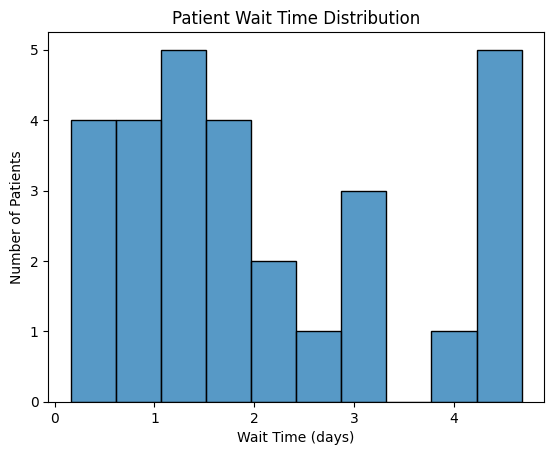

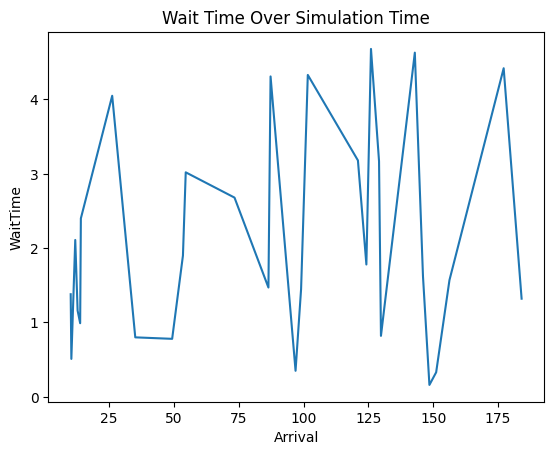

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['WaitTime'], bins=10)
plt.title("Patient Wait Time Distribution")
plt.xlabel("Wait Time (days)")
plt.ylabel("Number of Patients")
plt.show()

sns.lineplot(x='Arrival', y='WaitTime', data=df)
plt.title("Wait Time Over Simulation Time")
plt.show()


In [12]:
# Run this in Colab
!git config --global user.email "kritika.sharma.8495@gmail.com"
!git config --global user.name "Kritika8495"

In [13]:
!git add .
!git commit -m "Initial commit: LTC patient flow simulation with SimPy and visualization"
!git branch -M main
!git push  https://github.com/Kritika8495/Simulating-Patient-Flow-in-a-Long-Term-Care-Facility-using-SimPy.git main

[main (root-commit) 89e144b] Initial commit: LTC patient flow simulation with SimPy and visualization
 21 files changed, 51025 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.06.23/13.36.59.539466.log
 create mode 100644 .config/logs/2025.06.23/13.37.21.645147.log
 create mode 100644 .config/logs/2025.06.23/13.37.31.575304.log
 create mode 100644 .config/logs/2025.06.23/13.37.33.586566.log
 create mode 100644 .config/logs/2025.06.23/13.37.43.483451.log
 create mode 100644 .config/logs/2025.06.23/13.37.44.211435.log
 cr